In [40]:
! pip install wordcloud
! pip install nltk

4027.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4033.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [65]:
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
import wordcloud
import nltk
import tqdm

mp.set_start_method('fork', force=True)

def work(data):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.update(["..."])
    gTokens = []
    lmtzr = nltk.stem.WordNetLemmatizer()
    stemmer = nltk.stem.PorterStemmer()
    for sentence in tqdm.tqdm(data["text"], desc="tokenizing"):
        tokens = [t for t in nltk.word_tokenize(sentence)]
        tokens = [t for t in tokens if t not in stop_words]
        tokens = [t for t in tokens if len(t) >= 3]
        tokens = [t.lower() for t in tokens]
        tokens = [lmtzr.lemmatize(t, 'v') for t in tokens]
        tokens = [stemmer.stem(t) for t in tokens]
        [gTokens.append(t) for t in tokens if t != "n't"]
    return pd.Series(gTokens)



if __name__ == "__main__":
    T_COUNT = 8
    B_SIZE = 1024
    WHOLE_SIZE = 1600000

    #nltk.download('all')
    data = pd.read_csv("training.1600000.processed.noemoticon.csv",
                        encoding='ISO-8859-1',
                        names=["target", "id","date", "flag", "user", "text" ]
                        )

    data0 = data[data["target"] == 0]
    data4 = data[data["target"] == 4]
    data = [data0, data4]
    with mp.Pool(processes=2) as p:
        res = p.map(work, data)
    
    print(res[1])

    
    
    


tokenizing: 100%|██████████| 800000/800000 [06:00<00:00, 2221.12it/s]


0                    love
1          health4uandpet
2                     guy
3                    best
4                    meet
                ...      
6051237             happi
6051238    charitytuesday
6051239          thenspcc
6051240        sparkschar
6051241     speakinguph4h
Length: 6051242, dtype: object


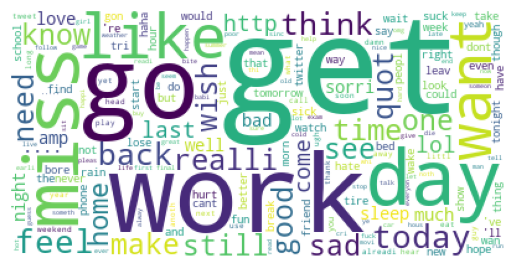

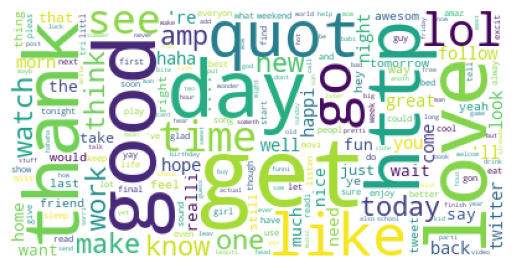

In [78]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white")
cloud = wc.generate_from_frequencies(res[0].value_counts())

plt.Figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

cloud = wc.generate_from_frequencies(res[1].value_counts())

plt.Figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()
